In [130]:
import pandas as pd
import numpy as np
import sqlite3

# Reconnect to the database
conn = sqlite3.connect('./ipl_database.db')
# Query the database
df_ball = pd.read_sql_query('SELECT * FROM ipl_ball_by_ball;', conn)

# Display the first few rows of the table
print(df_ball)

# Close the connection
conn.close()


             ID  innings  overs  ballnumber       batter          bowler   
0       1312200        1      0           1  YBK Jaiswal  Mohammed Shami  \
1       1312200        1      0           2  YBK Jaiswal  Mohammed Shami   
2       1312200        1      0           3   JC Buttler  Mohammed Shami   
3       1312200        1      0           4  YBK Jaiswal  Mohammed Shami   
4       1312200        1      0           5  YBK Jaiswal  Mohammed Shami   
...         ...      ...    ...         ...          ...             ...   
225949   335982        2     14           5      P Kumar        I Sharma   
225950   335982        2     14           6     SB Joshi        I Sharma   
225951   335982        2     14           7      P Kumar        I Sharma   
225952   335982        2     15           1     SB Joshi       LR Shukla   
225953   335982        2     15           2     SB Joshi       LR Shukla   

        non-striker extra_type  batsman_run  extras_run  total_run   
0        JC Buttl

In [131]:
unique_batters = df_ball['batter'].unique().tolist()

print(unique_batters)

['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D Padikkal', 'SO Hetmyer', 'R Ashwin', 'R Parag', 'TA Boult', 'OC McCoy', 'WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pandya', 'DA Miller', 'V Kohli', 'F du Plessis', 'RM Patidar', 'GJ Maxwell', 'MK Lomror', 'KD Karthik', 'Shahbaz Ahmed', 'PWH de Silva', 'HV Patel', 'JR Hazlewood', 'Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda', 'MP Stoinis', 'E Lewis', 'KH Pandya', 'PVD Chameera', 'PK Garg', 'Abhishek Sharma', 'RA Tripathi', 'AK Markram', 'N Pooran', 'Washington Sundar', 'R Shepherd', 'J Suchith', 'B Kumar', 'Umran Malik', 'JM Bairstow', 'S Dhawan', 'M Shahrukh Khan', 'MA Agarwal', 'LS Livingstone', 'JM Sharma', 'PN Mankad', 'PP Shaw', 'DA Warner', 'MR Marsh', 'RR Pant', 'SN Khan', 'R Powell', 'AR Patel', 'SN Thakur', 'Kuldeep Yadav', 'Ishan Kishan', 'RG Sharma', 'D Brevis', 'Tilak Varma', 'TH David', 'Ramandeep Singh', 'DR Sams', 'RD Gaikwad', 'DP Conway', 'MM Ali', 'N Jagadeesan', 'AT Rayudu', 'MS Dhoni', 'Simarjeet Singh', 'MJ Santner', 'R 

In [132]:
import sqlite3
import pandas as pd

def get_batting_stats(player_name):
    # Establish a connection to the SQLite database
    conn = sqlite3.connect('./ipl_database.db')

    # Define the SQL query with the corrected column name
    query = f'''
    SELECT
        innings,
        overs,
        SUM(CASE WHEN batter = ? THEN batsman_run ELSE 0 END) AS runs_scored,
        SUM((CASE WHEN isWicketDelivery = 1 AND player_out == ? THEN 1 ELSE 0 END)) AS Dismissals,
        COUNT(CASE WHEN (extra_type IS NULL OR extra_type = 'byes' OR extra_type = 'legbyes' OR extra_type = 'noballs') AND (batter = ?) THEN 1 ELSE NULL END) AS balls_faced
    FROM
        ipl_ball_by_ball
    WHERE
        batter = ? or "non-striker" = ?
    GROUP BY
        innings,
        overs
    ORDER BY
        innings,
        overs;
    '''

    # Execute the query with the player name as a parameter
    df = pd.read_sql_query(query, conn, params=(player_name, player_name, player_name, player_name, player_name))

    # Close the connection
    conn.close()

    return df

# Example usage
player_name = 'AB de Villiers'  # Replace with the actual player name
batter_stats_df = get_batting_stats(player_name)
batter_stats_df

,innings,overs,runs_scored,Dismissals,balls_faced
0,1,0,19,0,10
1,1,1,22,1,23
2,1,2,28,1,38
3,1,3,83,0,76
4,1,4,114,2,72
5,1,5,144,2,92
6,1,6,118,2,95
7,1,7,110,4,97
8,1,8,127,2,105
9,1,9,162,2,120


In [133]:
# Assuming you have a DataFrame named batter_stats_df
# Filter the DataFrame based on innings, overs range, and runs scored
innings_x = 1  # Specify the innings
overs_y = 6  # Specify the starting over
overs_z = 10  # Specify the ending over

filtered_batter_df = batter_stats_df[
    (batter_stats_df['innings'].isin([1, 2])) &  # Filter by innings
    (batter_stats_df['overs'] >= overs_y) &      # Filter by starting over
    (batter_stats_df['overs'] <= overs_z)
]

# Print the filtered DataFrame
filtered_batter_df

,innings,overs,runs_scored,Dismissals,balls_faced
6,1,6,118,2,95
7,1,7,110,4,97
8,1,8,127,2,105
9,1,9,162,2,120
10,1,10,172,5,134
26,2,6,93,5,95
27,2,7,111,3,99
28,2,8,133,4,113
29,2,9,133,3,106
30,2,10,136,4,103


In [134]:
def stat(player_name, batter_stats_df, overs_y, overs_z):
    # Assuming you have a DataFrame named batter_stats_df
    # Filter the DataFrame based on innings, overs range, and runs scored
     # Specify the ending over

    filtered_batter_df = batter_stats_df[
        (batter_stats_df['innings'].isin([1, 2])) &  # Filter by innings
        (batter_stats_df['overs'] >= overs_y) &      # Filter by starting over
        (batter_stats_df['overs'] <= overs_z)
    ]

    # Print the filtered DataFrame
    runs_score = filtered_batter_df["runs_scored"].sum()
    balls_faced = filtered_batter_df["balls_faced"].sum()
    dismissals = filtered_batter_df["Dismissals"].sum()
    average = runs_score/dismissals
    strike_rate = (runs_score/balls_faced)*100
    print(player_name)
    print(runs_score, balls_faced, dismissals, average, strike_rate)

    return [player_name, runs_score, balls_faced, dismissals, average, strike_rate]

stat("AB de Villiers", get_batting_stats("AB de Villiers"), 6, 10)

AB de Villiers
1295 1067 34 38.088235294117645 121.36832239925025


['AB de Villiers', 1295, 1067, 34, 38.088235294117645, 121.36832239925025]

In [135]:
runs_score = filtered_batter_df["runs_scored"].sum()
balls_faced = filtered_batter_df["balls_faced"].sum()
dismissals = filtered_batter_df["Dismissals"].sum()
average = runs_score/dismissals
strike_rate = (runs_score/balls_faced)*100
print(runs_score, balls_faced, dismissals, average, strike_rate)

1295 1067 34 38.088235294117645 121.36832239925025


In [136]:
def batting_stats_overs(player_name, batter_stats_df , overs_y, overs_z):

    filtered_batter_df = batter_stats_df[
        (batter_stats_df['innings'].isin([1, 2])) &  # Filter by innings
        (batter_stats_df['overs'] >= overs_y) &      # Filter by starting over
        (batter_stats_df['overs'] <= overs_z)
    ]


    runs_score = filtered_batter_df["runs_scored"].sum()
    balls_faced = filtered_batter_df["balls_faced"].sum()
    dismissals = filtered_batter_df["Dismissals"].sum()
    average = runs_score/dismissals
    strike_rate = (runs_score/balls_faced)*100
    
    return [player_name, runs_score, balls_faced, dismissals, average, strike_rate]

# Best Batters in the Powerplay

In [137]:
batting_power_play = []
for i in unique_batters:
    df = get_batting_stats(i)
    batting_power_play.append(batting_stats_overs(i, df, 0, 5))

C:\Users\anubr\AppData\Local\Temp\ipykernel_30576\4238514807.py:13: RuntimeWarning: invalid value encountered in scalar divide
  average = runs_score/dismissals
C:\Users\anubr\AppData\Local\Temp\ipykernel_30576\4238514807.py:14: RuntimeWarning: invalid value encountered in scalar divide
  strike_rate = (runs_score/balls_faced)*100
C:\Users\anubr\AppData\Local\Temp\ipykernel_30576\4238514807.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  average = runs_score/dismissals


In [138]:
batting_power_play

[['YBK Jaiswal', 366, 272, 12, 30.5, 134.55882352941177],
 ['JC Buttler', 1229, 854, 26, 47.26923076923077, 143.9110070257611],
 ['SV Samson', 999, 849, 35, 28.542857142857144, 117.6678445229682],
 ['D Padikkal', 631, 512, 19, 33.21052631578947, 123.2421875],
 ['SO Hetmyer', 53, 51, 2, 26.5, 103.921568627451],
 ['R Ashwin', 58, 56, 4, 14.5, 103.57142857142858],
 ['R Parag', 0, 11, 1, 0.0, 0.0],
 ['TA Boult', 0, 0, 0, nan, nan],
 ['OC McCoy', 0, 0, 0, nan, nan],
 ['WP Saha', 972, 727, 35, 27.771428571428572, 133.70013755158183],
 ['Shubman Gill', 882, 729, 22, 40.09090909090909, 120.98765432098766],
 ['MS Wade', 113, 98, 6, 18.833333333333332, 115.3061224489796],
 ['HH Pandya', 84, 100, 3, 28.0, 84.0],
 ['DA Miller', 87, 93, 5, 17.4, 93.54838709677419],
 ['V Kohli', 2125, 1825, 58, 36.63793103448276, 116.43835616438356],
 ['F du Plessis', 1480, 1156, 38, 38.94736842105263, 128.02768166089967],
 ['RM Patidar', 107, 99, 2, 53.5, 108.08080808080808],
 ['GJ Maxwell', 349, 259, 16, 21.8125, 

In [139]:
batting_power_play_df = pd.DataFrame(batting_power_play, columns=['Batter', 'runs', 'balls', 'Dismissals', 'average', 'strike_rate'])
batting_power_play_df

,Batter,runs,balls,Dismissals,average,strike_rate
0,YBK Jaiswal,366,272,12,30.500000,134.558824
1,JC Buttler,1229,854,26,47.269231,143.911007
2,SV Samson,999,849,35,28.542857,117.667845
3,D Padikkal,631,512,19,33.210526,123.242188
4,SO Hetmyer,53,51,2,26.500000,103.921569
...,...,...,...,...,...,...
600,D Kalyankrishna,0,0,0,NaN,NaN
601,MA Khote,0,0,0,NaN,NaN
602,SB Joshi,0,0,0,NaN,NaN
603,DS Lehmann,4,3,0,inf,133.333333


In [140]:
sorted_batting_powerplay_df = batting_power_play_df.sort_values('runs', ascending=False)
filtered_sorted_batting_powerplay_df = sorted_batting_powerplay_df.query('runs >= 500').dropna()
print(len(filtered_sorted_batting_powerplay_df))
filtered_sorted_batting_powerplay_df

54


,Batter,runs,balls,Dismissals,average,strike_rate
43,S Dhawan,3157,2584,86,36.709302,122.174923
50,DA Warner,2892,2106,65,44.492308,137.321937
189,CH Gayle,2373,1761,64,37.078125,134.752981
280,G Gambhir,2277,1868,69,33.000000,121.895075
14,V Kohli,2125,1825,58,36.637931,116.438356
101,AM Rahane,2049,1783,65,31.523077,114.918676
105,RV Uthappa,2035,1636,62,32.822581,124.388753
242,PA Patel,1904,1565,73,26.082192,121.661342
59,RG Sharma,1632,1389,55,29.672727,117.494600
24,Q de Kock,1631,1248,45,36.244444,130.689103


In [141]:
# Reset index of filtered_sorted_batting_powerplay_df
filtered_sorted_batting_powerplay_df = filtered_sorted_batting_powerplay_df.reset_index(drop=True)
len(filtered_sorted_batting_powerplay_df)

54

In [142]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the data
data = filtered_sorted_batting_powerplay_df
# Handle missing values
data = data.dropna()

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(data[['runs', 'average', 'strike_rate']])

# Create and train the neural network
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(3,)))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse')
model.fit(X, X, epochs=100, batch_size=32, verbose=0)

# Inspect the model's summary to find the correct layer name
model.summary()

encoder = tf.keras.Model(model.input, model.layers[-2].output)
print(encoder)
encoded_data = encoder.predict(X)
print("encoder data")
print(encoded_data)
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(encoded_data)

# Assign the cluster labels back to the original data
data['Cluster'] = labels

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 32)                128       
                                                                 
 dropout_12 (Dropout)        (None, 32)                0         
                                                                 
 dense_53 (Dense)            (None, 16)                528       
                                                                 
 dropout_13 (Dropout)        (None, 16)                0         
                                                                 
 dense_54 (Dense)            (None, 8)                 136       
                                                                 
 dropout_14 (Dropout)        (None, 8)                 0         
                                                                 
 dense_55 (Dense)            (None, 1)               

c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [143]:
type(encoded_data)

numpy.ndarray

In [144]:
encoded_data.shape

(54, 8)

In [145]:
# Assuming 'data' is your DataFrame
sorted_data = data.sort_values(by='Cluster', ascending=False)

# Display the sorted DataFrame
sorted_data

,Batter,runs,balls,Dismissals,average,strike_rate,Cluster
40,Ishan Kishan,679,551,12,56.583333,123.230490,2
32,RA Tripathi,779,549,24,32.458333,141.894353,2
33,CA Lynn,779,540,17,45.823529,144.259259,2
36,SA Yadav,727,516,14,51.928571,140.891473,2
45,ML Hayden,599,461,13,46.076923,129.934924,2
10,KL Rahul,1594,1274,28,56.928571,125.117739,2
19,DR Smith,1213,976,27,44.925926,124.282787,2
18,JC Buttler,1229,854,26,47.269231,143.911007,2
38,JM Bairstow,695,470,14,49.642857,147.872340,2
39,M Vohra,681,529,25,27.240000,128.733459,1


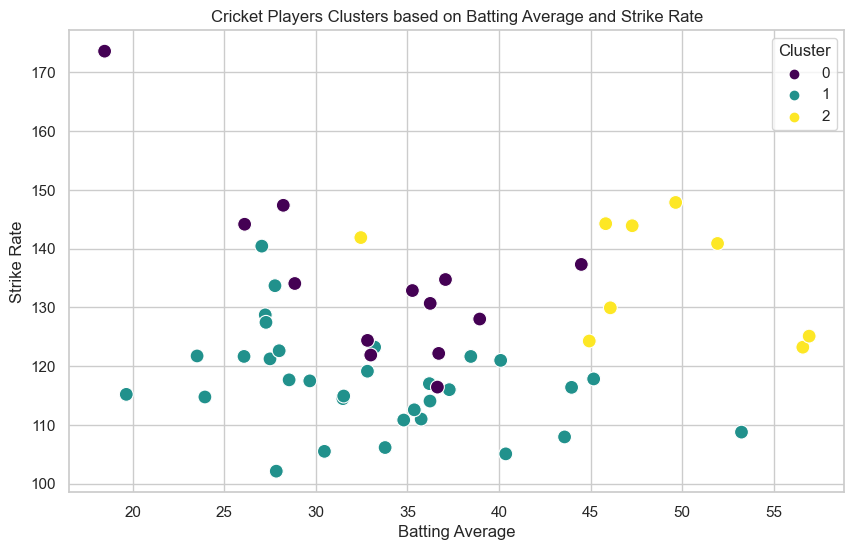

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with 'average' on the x-axis and 'strike_rate' on the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average', y='strike_rate', hue='Cluster', data=sorted_data, palette='viridis', s=100)

# Set the title and labels of the plot
plt.title('Cricket Players Clusters based on Batting Average and Strike Rate')
plt.xlabel('Batting Average')
plt.ylabel('Strike Rate')

# Show the plot
plt.legend(title='Cluster')
plt.show()

In [147]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Assuming 'data' is your DataFrame and 'X' is the standardized input features
data = filtered_sorted_batting_powerplay_df
# Handle missing values
data = data.dropna()

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(data[['runs', 'average', 'strike_rate']])
# Define the size of the encoding
encoding_dim = 2  # This is the size of our encoded representations (bottleneck)

# Define the input layer with the same number of neurons as the input features
input_data = Input(shape=(3,))

# "encoded" is the encoded representation of the input
encoded = Dense(32, activation='relu')(input_data)
encoded = Dense(16, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)  # Bottleneck layer

# "decoded" is the lossy reconstruction of the input
decoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(decoded)
decoded = Dense(3, activation='linear')(decoded)  # Output layer with same size as input

# This model maps an input to its reconstruction
autoencoder = Model(input_data, decoded)

# This model maps an input to its encoded representation
encoder = Model(input_data, encoded)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X, X,
                epochs=100,
                batch_size=32,
                shuffle=True,
                verbose=0)

# Use the encoder to encode the data
encoded_data = encoder.predict(X)

# Apply K-Means clustering on the encoded data
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(encoded_data)

# Assign the cluster labels back to the original DataFrame
data['Cluster'] = labels

2/2 [==============================] - 0s 2ms/step


c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [148]:
# Assuming 'data' is your DataFrame
sorted_data = data.sort_values(by='Cluster', ascending=False)

# Display the sorted DataFrame
sorted_data

,Batter,runs,balls,Dismissals,average,strike_rate,Cluster
18,JC Buttler,1229,854,26,47.269231,143.911007,2
40,Ishan Kishan,679,551,12,56.583333,123.230490,2
38,JM Bairstow,695,470,14,49.642857,147.872340,2
36,SA Yadav,727,516,14,51.928571,140.891473,2
35,SE Marsh,767,730,19,40.368421,105.068493,2
45,ML Hayden,599,461,13,46.076923,129.934924,2
33,CA Lynn,779,540,17,45.823529,144.259259,2
10,KL Rahul,1594,1274,28,56.928571,125.117739,2
31,MEK Hussey,828,767,19,43.578947,107.953064,2
47,LMP Simmons,542,460,12,45.166667,117.826087,2


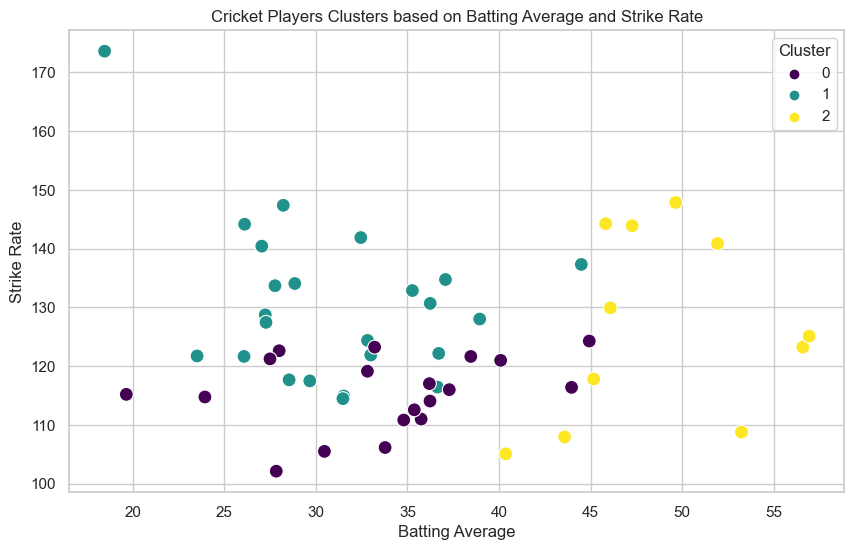

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with 'average' on the x-axis and 'strike_rate' on the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average', y='strike_rate', hue='Cluster', data=sorted_data, palette='viridis', s=100)

# Set the title and labels of the plot
plt.title('Cricket Players Clusters based on Batting Average and Strike Rate')
plt.xlabel('Batting Average')
plt.ylabel('Strike Rate')

# Show the plot
plt.legend(title='Cluster')
plt.show()

In [150]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Normalize the data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(filtered_sorted_batting_powerplay_df[['runs', 'average', 'strike_rate']])

# Define weights for the composite score
runs_weight = 0.1
avg_weight = 0.5
strike_rate_weight = 0.6

# Create a new column for the composite score
filtered_sorted_batting_powerplay_df['performance'] = (
    runs_weight * normalized_data[:, 0] +
    avg_weight * normalized_data[:, 1] +
    strike_rate_weight * normalized_data[:, 2]
)

# Split the data into features and target variable
X = normalized_data
y = filtered_sorted_batting_powerplay_df["performance"]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(3,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions
predictions = model.predict(X_test)

Epoch 1/100
2/2 [==============================] - 1s 5ms/step - loss: 0.6963 - accuracy: 0.0000e+00
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 0.6941 - accuracy: 0.0000e+00
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.0000e+00
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6907 - accuracy: 0.0000e+00
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6897 - accuracy: 0.0000e+00
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.0000e+00
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6882 - accuracy: 0.0000e+00
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6873 - accuracy: 0.0000e+00
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.0000e+00
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 

In [151]:
predictions

array([[0.7261419 ],
       [0.5329341 ],
       [0.31084588],
       [0.27484155],
       [0.48768035],
       [0.43342423],
       [0.6106317 ],
       [0.784719  ],
       [0.3559199 ],
       [0.73420274],
       [0.45000416]], dtype=float32)

In [152]:
len(predictions)

11

In [153]:
output_players_performance = model.predict(X)
print(output_players_performance)

2/2 [==============================] - 0s 2ms/step
[[0.50862557]
 [0.7259262 ]
 [0.5943441 ]
 [0.41654634]
 [0.4075263 ]
 [0.32976168]
 [0.42579833]
 [0.31505126]
 [0.31084588]
 [0.51659673]
 [0.73420274]
 [0.49595407]
 [0.30438778]
 [0.3610773 ]
 [0.5201883 ]
 [0.5223228 ]
 [0.3285081 ]
 [0.43342423]
 [0.75708306]
 [0.565209  ]
 [0.2546097 ]
 [0.47525236]
 [0.5329341 ]
 [0.34025323]
 [0.21019208]
 [0.27012864]
 [0.39313564]
 [0.20901148]
 [0.5196774 ]
 [0.45000413]
 [0.30258724]
 [0.38240284]
 [0.5294894 ]
 [0.7261419 ]
 [0.24234203]
 [0.31379357]
 [0.77023184]
 [0.3257355 ]
 [0.784719  ]
 [0.33249936]
 [0.697352  ]
 [0.6041243 ]
 [0.36312523]
 [0.21285696]
 [0.27484155]
 [0.6106317 ]
 [0.34985504]
 [0.48768035]
 [0.19173305]
 [0.2827196 ]
 [0.3559199 ]
 [0.43145835]
 [0.28980994]
 [0.42134708]]


In [154]:
len(output_players_performance)

54

In [155]:
filtered_sorted_batting_powerplay_df

,Batter,runs,balls,Dismissals,average,strike_rate,performance
0,S Dhawan,3157,2584,86,36.709302,122.174923,0.505364
1,DA Warner,2892,2106,65,44.492308,137.321937,0.723681
2,CH Gayle,2373,1761,64,37.078125,134.752981,0.586194
3,G Gambhir,2277,1868,69,33.000000,121.895075,0.421668
4,V Kohli,2125,1825,58,36.637931,116.438356,0.417460
5,AM Rahane,2049,1783,65,31.523077,114.918676,0.335346
6,RV Uthappa,2035,1636,62,32.822581,124.388753,0.431178
7,PA Patel,1904,1565,73,26.082192,121.661342,0.315725
8,RG Sharma,1632,1389,55,29.672727,117.494600,0.317208
9,Q de Kock,1631,1248,45,36.244444,130.689103,0.513329


# Best Batters In the Powerplay

In [156]:
import pandas as pd

# Create a new dataframe from the array
performance_df = pd.DataFrame(output_players_performance, columns=['Predicted Performance'])

# Concatenate the two dataframes along the column axis
merged_batting_powerplay_df = pd.concat([filtered_sorted_batting_powerplay_df, performance_df], axis=1)
merged_batting_powerplay_df = merged_batting_powerplay_df.sort_values('Predicted Performance', ascending=False)
merged_batting_powerplay_df = merged_batting_powerplay_df.reset_index(drop=True)
merged_batting_powerplay_df

,Batter,runs,balls,Dismissals,average,strike_rate,performance,Predicted Performance
0,JM Bairstow,695,470,14,49.642857,147.872340,0.796487,0.784719
1,SA Yadav,727,516,14,51.928571,140.891473,0.768834,0.770232
2,JC Buttler,1229,854,26,47.269231,143.911007,0.752485,0.757083
3,KL Rahul,1594,1274,28,56.928571,125.117739,0.734117,0.734203
4,CA Lynn,779,540,17,45.823529,144.259259,0.719674,0.726142
5,DA Warner,2892,2106,65,44.492308,137.321937,0.723681,0.725926
6,Ishan Kishan,679,551,12,56.583333,123.230490,0.679355,0.697352
7,ML Hayden,599,461,13,46.076923,129.934924,0.595999,0.610632
8,SP Narine,665,383,36,18.472222,173.629243,0.606210,0.604124
9,CH Gayle,2373,1761,64,37.078125,134.752981,0.586194,0.594344


# Batting Middle Overs Part 1

In [157]:
batting_middle_one = []
for i in unique_batters:
    batting_middle_one.append(batting_stats_overs(i, get_batting_stats(i), 6, 10))

C:\Users\anubr\AppData\Local\Temp\ipykernel_30576\4238514807.py:13: RuntimeWarning: invalid value encountered in scalar divide
  average = runs_score/dismissals
C:\Users\anubr\AppData\Local\Temp\ipykernel_30576\4238514807.py:14: RuntimeWarning: invalid value encountered in scalar divide
  strike_rate = (runs_score/balls_faced)*100
C:\Users\anubr\AppData\Local\Temp\ipykernel_30576\4238514807.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  average = runs_score/dismissals


In [158]:
batting_stats_overs("AB de Villiers", get_batting_stats("AB de Villiers") , 6, 10)

['AB de Villiers', 1295, 1067, 34, 38.088235294117645, 121.36832239925025]

In [159]:
batting_middle_one

[['YBK Jaiswal', 134, 97, 6, 22.333333333333332, 138.1443298969072],
 ['JC Buttler', 658, 493, 14, 47.0, 133.46855983772818],
 ['SV Samson', 1209, 901, 34, 35.55882352941177, 134.18423973362928],
 ['D Padikkal', 334, 280, 8, 41.75, 119.28571428571428],
 ['SO Hetmyer', 49, 47, 3, 16.333333333333332, 104.25531914893618],
 ['R Ashwin', 33, 39, 1, 33.0, 84.61538461538461],
 ['R Parag', 71, 78, 2, 35.5, 91.02564102564102],
 ['TA Boult', 0, 0, 0, nan, nan],
 ['OC McCoy', 0, 0, 0, nan, nan],
 ['WP Saha', 428, 460, 20, 21.4, 93.04347826086956],
 ['Shubman Gill', 479, 401, 17, 28.176470588235293, 119.45137157107233],
 ['MS Wade', 62, 64, 4, 15.5, 96.875],
 ['HH Pandya', 307, 250, 9, 34.111111111111114, 122.8],
 ['DA Miller', 490, 489, 10, 49.0, 100.20449897750512],
 ['V Kohli', 1801, 1583, 36, 50.02777777777778, 113.77132027795325],
 ['F du Plessis', 817, 712, 21, 38.904761904761905, 114.74719101123596],
 ['RM Patidar', 154, 100, 2, 77.0, 154.0],
 ['GJ Maxwell', 751, 546, 27, 27.814814814814813

In [160]:
batting_middle_one_df = pd.DataFrame(batting_middle_one, columns=['Batter', 'runs', 'balls', 'Dismissals', 'average', 'strike_rate'])
batting_middle_one_df

,Batter,runs,balls,Dismissals,average,strike_rate
0,YBK Jaiswal,134,97,6,22.333333,138.144330
1,JC Buttler,658,493,14,47.000000,133.468560
2,SV Samson,1209,901,34,35.558824,134.184240
3,D Padikkal,334,280,8,41.750000,119.285714
4,SO Hetmyer,49,47,3,16.333333,104.255319
...,...,...,...,...,...,...
600,D Kalyankrishna,0,0,0,NaN,NaN
601,MA Khote,0,0,0,NaN,NaN
602,SB Joshi,0,0,0,NaN,NaN
603,DS Lehmann,14,13,1,14.000000,107.692308


In [161]:
sorted_batting_middle_one_df = batting_middle_one_df.sort_values('runs', ascending=False)
filtered_sorted_batting_middle_one_df = sorted_batting_middle_one_df.query('runs >= 500').dropna()
print(len(filtered_sorted_batting_middle_one_df))
filtered_sorted_batting_middle_one_df

45


,Batter,runs,balls,Dismissals,average,strike_rate
14,V Kohli,1801,1583,36,50.027778,113.771320
179,SK Raina,1786,1460,48,37.208333,122.328767
43,S Dhawan,1624,1351,43,37.767442,120.207254
50,DA Warner,1546,1163,33,46.848485,132.932072
105,RV Uthappa,1462,1214,55,26.581818,120.428336
59,RG Sharma,1420,1336,54,26.296296,106.287425
176,AB de Villiers,1295,1067,34,38.088235,121.368322
189,CH Gayle,1221,859,31,39.387097,142.142026
2,SV Samson,1209,901,34,35.558824,134.184240
220,SR Watson,1158,800,36,32.166667,144.750000


In [162]:
# Reset index of filtered_sorted_batting_powerplay_df
filtered_sorted_batting_middle_one_df = filtered_sorted_batting_middle_one_df.reset_index(drop=True)
len(filtered_sorted_batting_middle_one_df)

45

In [163]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Normalize the data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(filtered_sorted_batting_middle_one_df[['runs', 'average', 'strike_rate']])

# Define weights for the composite score
runs_weight = 0.1
avg_weight = 0.5
strike_rate_weight = 0.6

# Create a new column for the composite score
filtered_sorted_batting_middle_one_df['performance'] = (
    runs_weight * normalized_data[:, 0] +
    avg_weight * normalized_data[:, 1] +
    strike_rate_weight * normalized_data[:, 2]
)

# Split the data into features and target variable
X = normalized_data
y = filtered_sorted_batting_middle_one_df["performance"]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(3,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions
predictions = model.predict(X_test)

Epoch 1/100
2/2 [==============================] - 1s 4ms/step - loss: 0.7039 - accuracy: 0.0000e+00
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 0.7018 - accuracy: 0.0000e+00
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7001 - accuracy: 0.0000e+00
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6986 - accuracy: 0.0000e+00
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6976 - accuracy: 0.0000e+00
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6964 - accuracy: 0.0000e+00
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6957 - accuracy: 0.0000e+00
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.0000e+00
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.0000e+00
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 

In [164]:
predictions

array([[0.5535321 ],
       [0.54969937],
       [0.71345335],
       [0.5274254 ],
       [0.5721758 ],
       [0.6996488 ],
       [0.34015206],
       [0.36704433],
       [0.2724258 ]], dtype=float32)

In [165]:
len(predictions)

9

In [166]:
output_players_performance = model.predict(X)
print(output_players_performance)

2/2 [==============================] - 0s 2ms/step
[[0.66032696]
 [0.5721758 ]
 [0.54976606]
 [0.7493672 ]
 [0.4097634 ]
 [0.2909643 ]
 [0.53915703]
 [0.71345335]
 [0.6105778 ]
 [0.6479128 ]
 [0.4194724 ]
 [0.3881903 ]
 [0.2724258 ]
 [0.42172348]
 [0.5808617 ]
 [0.5197266 ]
 [0.36704433]
 [0.8100133 ]
 [0.82574296]
 [0.45270452]
 [0.43152365]
 [0.5535321 ]
 [0.55033356]
 [0.49277055]
 [0.77538913]
 [0.34015206]
 [0.27430907]
 [0.24194434]
 [0.3505998 ]
 [0.4478246 ]
 [0.6996488 ]
 [0.40906554]
 [0.43609178]
 [0.26729134]
 [0.54969937]
 [0.35795897]
 [0.33648613]
 [0.21558999]
 [0.1924935 ]
 [0.24503268]
 [0.5274254 ]
 [0.50390524]
 [0.53277194]
 [0.5790117 ]
 [0.5039361 ]]


In [167]:
len(output_players_performance)

45

In [168]:
filtered_sorted_batting_middle_one_df

,Batter,runs,balls,Dismissals,average,strike_rate,performance
0,V Kohli,1801,1583,36,50.027778,113.771320,0.648259
1,SK Raina,1786,1460,48,37.208333,122.328767,0.563766
2,S Dhawan,1624,1351,43,37.767442,120.207254,0.541046
3,DA Warner,1546,1163,33,46.848485,132.932072,0.743048
4,RV Uthappa,1462,1214,55,26.581818,120.428336,0.398381
5,RG Sharma,1420,1336,54,26.296296,106.287425,0.279636
6,AB de Villiers,1295,1067,34,38.088235,121.368322,0.528671
7,CH Gayle,1221,859,31,39.387097,142.142026,0.703023
8,SV Samson,1209,901,34,35.558824,134.184240,0.593839
9,SR Watson,1158,800,36,32.166667,144.750000,0.633686


# Best Batters In the Middle Part 1

In [169]:
import pandas as pd

# Create a new dataframe from the array
performance_df = pd.DataFrame(output_players_performance, columns=['Actual Performance'])

# Concatenate the two dataframes along the column axis
merged_filtered_sorted_batting_middle_one_df = pd.concat([filtered_sorted_batting_middle_one_df, performance_df], axis=1)
merged_filtered_sorted_batting_middle_one_df = merged_filtered_sorted_batting_middle_one_df.sort_values('Actual Performance', ascending=False)
merged_filtered_sorted_batting_middle_one_df = merged_filtered_sorted_batting_middle_one_df.reset_index(drop=True)
merged_filtered_sorted_batting_middle_one_df

,Batter,runs,balls,Dismissals,average,strike_rate,performance,Actual Performance
0,SE Marsh,856,604,14,61.142857,141.721854,0.928146,0.825743
1,RR Pant,913,678,15,60.866667,134.660767,0.873288,0.810013
2,V Sehwag,749,449,20,37.450000,166.815145,0.839446,0.775389
3,DA Warner,1546,1163,33,46.848485,132.932072,0.743048,0.749367
4,CH Gayle,1221,859,31,39.387097,142.142026,0.703023,0.713453
5,JC Buttler,658,493,14,47.000000,133.468560,0.680623,0.699649
6,V Kohli,1801,1583,36,50.027778,113.771320,0.648259,0.660327
7,SR Watson,1158,800,36,32.166667,144.750000,0.633686,0.647913
8,SV Samson,1209,901,34,35.558824,134.184240,0.593839,0.610578
9,KL Rahul,989,781,25,39.560000,126.632522,0.564183,0.580862


# Batting Middle Overs Part 2

In [170]:
batting_middle_two = []
for i in unique_batters:
    batting_middle_two.append(batting_stats_overs(i, get_batting_stats(i), 11, 15))

C:\Users\anubr\AppData\Local\Temp\ipykernel_30576\4238514807.py:13: RuntimeWarning: invalid value encountered in scalar divide
  average = runs_score/dismissals
C:\Users\anubr\AppData\Local\Temp\ipykernel_30576\4238514807.py:14: RuntimeWarning: invalid value encountered in scalar divide
  strike_rate = (runs_score/balls_faced)*100
C:\Users\anubr\AppData\Local\Temp\ipykernel_30576\4238514807.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  average = runs_score/dismissals


In [171]:
batting_middle_two

[['YBK Jaiswal', 47, 37, 5, 9.4, 127.02702702702702],
 ['JC Buttler', 616, 381, 19, 32.421052631578945, 161.67979002624674],
 ['SV Samson', 880, 621, 29, 30.344827586206897, 141.70692431561997],
 ['D Padikkal', 265, 193, 11, 24.09090909090909, 137.30569948186528],
 ['SO Hetmyer', 298, 232, 8, 37.25, 128.44827586206898],
 ['R Ashwin', 175, 167, 9, 19.444444444444443, 104.79041916167664],
 ['R Parag', 196, 165, 7, 28.0, 118.7878787878788],
 ['TA Boult', 2, 6, 1, 2.0, 33.33333333333333],
 ['OC McCoy', 0, 0, 0, nan, nan],
 ['WP Saha', 586, 430, 17, 34.470588235294116, 136.27906976744185],
 ['Shubman Gill', 389, 273, 10, 38.9, 142.49084249084248],
 ['MS Wade', 4, 9, 3, 1.3333333333333333, 44.44444444444444],
 ['HH Pandya', 574, 442, 17, 33.76470588235294, 129.86425339366517],
 ['DA Miller', 1083, 762, 26, 41.65384615384615, 142.1259842519685],
 ['V Kohli', 1707, 1230, 51, 33.470588235294116, 138.78048780487805],
 ['F du Plessis', 740, 555, 23, 32.17391304347826, 133.33333333333331],
 ['RM P

In [172]:
batting_middle_two_df = pd.DataFrame(batting_middle_two, columns=['Batter', 'runs', 'balls', 'Dismissals', 'average', 'strike_rate'])
batting_middle_two_df

,Batter,runs,balls,Dismissals,average,strike_rate
0,YBK Jaiswal,47,37,5,9.400000,127.027027
1,JC Buttler,616,381,19,32.421053,161.679790
2,SV Samson,880,621,29,30.344828,141.706924
3,D Padikkal,265,193,11,24.090909,137.305699
4,SO Hetmyer,298,232,8,37.250000,128.448276
...,...,...,...,...,...,...
600,D Kalyankrishna,0,0,0,NaN,NaN
601,MA Khote,12,9,1,12.000000,133.333333
602,SB Joshi,6,14,2,3.000000,42.857143
603,DS Lehmann,0,2,1,0.000000,0.000000


In [173]:
sorted_batting_middle_two_df = batting_middle_two_df.sort_values('runs', ascending=False)
filtered_sorted_batting_middle_two_df = sorted_batting_middle_two_df.query('runs >= 500').dropna()
print(len(filtered_sorted_batting_middle_two_df))
filtered_sorted_batting_middle_two_df

43


,Batter,runs,balls,Dismissals,average,strike_rate
70,MS Dhoni,1781,1591,39,45.666667,111.942175
176,AB de Villiers,1724,1119,37,46.594595,154.066130
14,V Kohli,1707,1230,51,33.470588,138.780488
59,RG Sharma,1682,1220,37,45.459459,137.868852
19,KD Karthik,1590,1188,53,30.000000,133.838384
179,SK Raina,1526,1026,54,28.259259,148.732943
69,AT Rayudu,1467,1047,48,30.562500,140.114613
116,KA Pollard,1366,1033,34,40.176471,132.236205
262,Yuvraj Singh,1278,931,43,29.720930,137.271751
241,YK Pathan,1206,847,44,27.409091,142.384888


In [174]:
# Reset index of filtered_sorted_batting_powerplay_df
filtered_sorted_batting_middle_two_df = filtered_sorted_batting_middle_two_df.reset_index(drop=True)
len(filtered_sorted_batting_middle_two_df)

43

In [175]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Normalize the data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(filtered_sorted_batting_middle_two_df[['runs', 'average', 'strike_rate']])

# Define weights for the composite score
runs_weight = 0.1
avg_weight = 0.5
strike_rate_weight = 0.7

# Create a new column for the composite score
filtered_sorted_batting_middle_two_df['performance'] = (
    runs_weight * normalized_data[:, 0] +
    avg_weight * normalized_data[:, 1] +
    strike_rate_weight * normalized_data[:, 2]
)

# Split the data into features and target variable
X = normalized_data
y = filtered_sorted_batting_middle_two_df["performance"]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(3,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions
predictions = model.predict(X_test)

Epoch 1/100
2/2 [==============================] - 1s 3ms/step - loss: 0.6984 - accuracy: 0.0000e+00
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6974 - accuracy: 0.0000e+00
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6971 - accuracy: 0.0000e+00
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 0.6965 - accuracy: 0.0000e+00
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 0.6958 - accuracy: 0.0000e+00
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6952 - accuracy: 0.0000e+00
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 0.6945 - accuracy: 0.0000e+00
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.0000e+00
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.0000e+00
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 

In [176]:
predictions

array([[0.37801066],
       [0.44640508],
       [0.50361097],
       [0.3446935 ],
       [0.54216045],
       [0.50000185],
       [0.60247797],
       [0.56020546],
       [0.6447231 ]], dtype=float32)

In [177]:
len(predictions)

9

In [178]:
output_players_performance = model.predict(X)
print(output_players_performance)

2/2 [==============================] - 0s 2ms/step
[[0.41101104]
 [0.7249282 ]
 [0.50000185]
 [0.60989165]
 [0.43023133]
 [0.50361097]
 [0.47506905]
 [0.49544358]
 [0.44044596]
 [0.44870582]
 [0.56162393]
 [0.58112234]
 [0.44286385]
 [0.5125706 ]
 [0.3993565 ]
 [0.65817803]
 [0.81887054]
 [0.272369  ]
 [0.3339419 ]
 [0.6164681 ]
 [0.44214448]
 [0.60247797]
 [0.39592794]
 [0.6447231 ]
 [0.4084802 ]
 [0.37801066]
 [0.58049047]
 [0.39497447]
 [0.44640508]
 [0.32268128]
 [0.29662398]
 [0.56387234]
 [0.54216045]
 [0.56020546]
 [0.3980441 ]
 [0.29583886]
 [0.3446935 ]
 [0.25231594]
 [0.23639497]
 [0.4213325 ]
 [0.25938746]
 [0.23112968]
 [0.29346743]]


In [179]:
len(output_players_performance)

43

In [180]:
filtered_sorted_batting_middle_two_df

,Batter,runs,balls,Dismissals,average,strike_rate,performance
0,MS Dhoni,1781,1591,39,45.666667,111.942175,0.399611
1,AB de Villiers,1724,1119,37,46.594595,154.066130,0.798610
2,V Kohli,1707,1230,51,33.470588,138.780488,0.501598
3,RG Sharma,1682,1220,37,45.459459,137.868852,0.631086
4,KD Karthik,1590,1188,53,30.000000,133.838384,0.405836
5,SK Raina,1526,1026,54,28.259259,148.732943,0.519326
6,AT Rayudu,1467,1047,48,30.562500,140.114613,0.461249
7,KA Pollard,1366,1033,34,40.176471,132.236205,0.492111
8,Yuvraj Singh,1278,931,43,29.720930,137.271751,0.410091
9,YK Pathan,1206,847,44,27.409091,142.384888,0.425114


# Best Batters In the Middle Part 2

In [181]:
import pandas as pd

# Create a new dataframe from the array
performance_df = pd.DataFrame(output_players_performance, columns=['Actual Performance'])

# Concatenate the two dataframes along the column axis
merged_filtered_sorted_batting_middle_two_df = pd.concat([filtered_sorted_batting_middle_two_df, performance_df], axis=1)
merged_filtered_sorted_batting_middle_two_df = merged_filtered_sorted_batting_middle_two_df.sort_values('Actual Performance', ascending=False)
merged_filtered_sorted_batting_middle_two_df = merged_filtered_sorted_batting_middle_two_df.reset_index(drop=True)
merged_filtered_sorted_batting_middle_two_df

,Batter,runs,balls,Dismissals,average,strike_rate,performance,Actual Performance
0,CH Gayle,967,517,18,53.722222,187.040619,1.129751,0.818871
1,AB de Villiers,1724,1119,37,46.594595,154.066130,0.798610,0.724928
2,SR Watson,1006,593,31,32.451613,169.645868,0.722379,0.658178
3,KL Rahul,754,517,12,62.833333,145.841393,0.835366,0.644723
4,AD Russell,893,559,26,34.346154,159.749553,0.643380,0.616468
5,RG Sharma,1682,1220,37,45.459459,137.868852,0.631086,0.609892
6,GJ Maxwell,848,492,30,28.266667,172.357724,0.686403,0.602478
7,DA Warner,1044,699,28,37.285714,149.356223,0.592670,0.581122
8,KS Williamson,730,478,19,38.421053,152.719665,0.612627,0.580490
9,SE Marsh,684,427,21,32.571429,160.187354,0.610340,0.563872


# Batting Death Overs

In [182]:
batting_death = []
for i in unique_batters:
    batting_death.append(batting_stats_overs(i, get_batting_stats(i), 16, 19))

C:\Users\anubr\AppData\Local\Temp\ipykernel_30576\4238514807.py:13: RuntimeWarning: invalid value encountered in scalar divide
  average = runs_score/dismissals
C:\Users\anubr\AppData\Local\Temp\ipykernel_30576\4238514807.py:14: RuntimeWarning: invalid value encountered in scalar divide
  strike_rate = (runs_score/balls_faced)*100
C:\Users\anubr\AppData\Local\Temp\ipykernel_30576\4238514807.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  average = runs_score/dismissals


In [183]:
batting_death

[['YBK Jaiswal', 0, 0, 0, nan, nan],
 ['JC Buttler', 328, 163, 12, 27.333333333333332, 201.22699386503066],
 ['SV Samson', 438, 227, 23, 19.043478260869566, 192.95154185022025],
 ['D Padikkal', 30, 28, 7, 4.285714285714286, 107.14285714285714],
 ['SO Hetmyer', 431, 216, 14, 30.785714285714285, 199.53703703703704],
 ['R Ashwin', 381, 288, 34, 11.205882352941176, 132.29166666666669],
 ['R Parag', 255, 164, 21, 12.142857142857142, 155.4878048780488],
 ['TA Boult', 51, 42, 4, 12.75, 121.42857142857142],
 ['OC McCoy', 8, 5, 1, 8.0, 160.0],
 ['WP Saha', 441, 281, 24, 18.375, 156.93950177935943],
 ['Shubman Gill', 150, 114, 10, 15.0, 131.57894736842107],
 ['MS Wade', 0, 0, 0, nan, nan],
 ['HH Pandya', 998, 538, 36, 27.72222222222222, 185.5018587360595],
 ['DA Miller', 795, 439, 26, 30.576923076923077, 181.09339407744875],
 ['V Kohli', 991, 491, 38, 26.07894736842105, 201.8329938900204],
 ['F du Plessis', 366, 183, 17, 21.529411764705884, 200.0],
 ['RM Patidar', 20, 10, 0, inf, 200.0],
 ['GJ M

In [184]:
batting_death_df = pd.DataFrame(batting_death, columns=['Batter', 'runs', 'balls', 'Dismissals', 'average', 'strike_rate'])
batting_death_df

,Batter,runs,balls,Dismissals,average,strike_rate
0,YBK Jaiswal,0,0,0,NaN,NaN
1,JC Buttler,328,163,12,27.333333,201.226994
2,SV Samson,438,227,23,19.043478,192.951542
3,D Padikkal,30,28,7,4.285714,107.142857
4,SO Hetmyer,431,216,14,30.785714,199.537037
...,...,...,...,...,...,...
600,D Kalyankrishna,3,8,1,3.000000,37.500000
601,MA Khote,12,13,1,12.000000,92.307692
602,SB Joshi,0,0,0,NaN,NaN
603,DS Lehmann,0,0,0,NaN,NaN


In [185]:
sorted_batting_death_df = batting_death_df.sort_values('runs', ascending=False)
filtered_sorted_batting_death_df = sorted_batting_death_df.query('runs >= 300').dropna()
print(len(filtered_sorted_batting_death_df))
filtered_sorted_batting_death_df

58


,Batter,runs,balls,Dismissals,average,strike_rate
70,MS Dhoni,2530,1352,73,34.657534,187.130178
116,KA Pollard,1708,941,69,24.753623,181.509033
176,AB de Villiers,1421,611,37,38.405405,232.569558
19,KD Karthik,1282,695,54,23.740741,184.460432
135,RA Jadeja,1155,730,52,22.211538,158.219178
59,RG Sharma,1145,581,48,23.854167,197.074010
12,HH Pandya,998,538,36,27.722222,185.501859
14,V Kohli,991,491,38,26.078947,201.832994
241,YK Pathan,858,515,33,26.000000,166.601942
80,AD Russell,854,408,36,23.722222,209.313725


In [186]:
# Reset index of filtered_sorted_batting_powerplay_df
filtered_sorted_batting_death_df = filtered_sorted_batting_death_df.reset_index(drop=True)
len(filtered_sorted_batting_death_df)

58

In [187]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Normalize the data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(filtered_sorted_batting_death_df[['runs', 'average', 'strike_rate']])

# Define weights for the composite score
runs_weight = 0.1
avg_weight = 0.3
strike_rate_weight = 0.7

# Create a new column for the composite score
filtered_sorted_batting_death_df['performance'] = (
    runs_weight * normalized_data[:, 0] +
    avg_weight * normalized_data[:, 1] +
    strike_rate_weight * normalized_data[:, 2]
)

# Split the data into features and target variable
X = normalized_data
y = filtered_sorted_batting_death_df["performance"]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(3,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions
predictions = model.predict(X_test)

Epoch 1/100
2/2 [==============================] - 1s 3ms/step - loss: 0.6940 - accuracy: 0.0000e+00
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.0000e+00
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.0000e+00
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6892 - accuracy: 0.0000e+00
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6879 - accuracy: 0.0000e+00
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6871 - accuracy: 0.0000e+00
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.0000e+00
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6854 - accuracy: 0.0000e+00
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6846 - accuracy: 0.0000e+00
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6834 - accuracy: 

In [188]:
predictions

array([[0.5777529 ],
       [0.7163901 ],
       [0.9143814 ],
       [0.24751866],
       [0.6326793 ],
       [0.61752516],
       [0.6142005 ],
       [0.17962785],
       [0.47075072],
       [0.30499303],
       [0.33574367],
       [0.5510604 ]], dtype=float32)

In [189]:
len(predictions)

12

In [190]:
output_players_performance = model.predict(X)
print(output_players_performance)

2/2 [==============================] - 0s 2ms/step
[[0.754091  ]
 [0.5749097 ]
 [0.9143814 ]
 [0.5674263 ]
 [0.35872927]
 [0.64929694]
 [0.6142005 ]
 [0.69919163]
 [0.447879  ]
 [0.71336794]
 [0.37758303]
 [0.5777529 ]
 [0.6062661 ]
 [0.6003967 ]
 [0.48872447]
 [0.43089557]
 [0.24751866]
 [0.36065245]
 [0.33574364]
 [0.4711016 ]
 [0.23702766]
 [0.7271511 ]
 [0.6326793 ]
 [0.29575458]
 [0.2714488 ]
 [0.45992336]
 [0.47075075]
 [0.23662141]
 [0.48838452]
 [0.3115004 ]
 [0.2798988 ]
 [0.53787035]
 [0.56026745]
 [0.7163901 ]
 [0.4844358 ]
 [0.4740621 ]
 [0.4097632 ]
 [0.77551824]
 [0.35582998]
 [0.6159531 ]
 [0.3420479 ]
 [0.10903903]
 [0.2903232 ]
 [0.11568221]
 [0.4397999 ]
 [0.6134967 ]
 [0.33518547]
 [0.4065258 ]
 [0.30499303]
 [0.3260845 ]
 [0.6868474 ]
 [0.2869786 ]
 [0.23490262]
 [0.15537855]
 [0.5510604 ]
 [0.2350299 ]
 [0.6175252 ]
 [0.17962785]]


In [191]:
len(output_players_performance)

58

In [192]:
filtered_sorted_batting_death_df

,Batter,runs,balls,Dismissals,average,strike_rate,performance
0,MS Dhoni,2530,1352,73,34.657534,187.130178,0.749985
1,KA Pollard,1708,941,69,24.753623,181.509033,0.574967
2,AB de Villiers,1421,611,37,38.405405,232.569558,1.036712
3,KD Karthik,1282,695,54,23.740741,184.460432,0.564861
4,RA Jadeja,1155,730,52,22.211538,158.219178,0.371324
5,RG Sharma,1145,581,48,23.854167,197.074010,0.642647
6,HH Pandya,998,538,36,27.722222,185.501859,0.599647
7,V Kohli,991,491,38,26.078947,201.832994,0.689707
8,YK Pathan,858,515,33,26.000000,166.601942,0.451730
9,AD Russell,854,408,36,23.722222,209.313725,0.708560


# Best Batters In the Death

In [193]:
import pandas as pd

# Create a new dataframe from the array
performance_df = pd.DataFrame(output_players_performance, columns=['Actual Performance'])

# Concatenate the two dataframes along the column axis
merged_filtered_sorted_batting_death_df = pd.concat([filtered_sorted_batting_death_df, performance_df], axis=1)
merged_filtered_sorted_batting_death_df = merged_filtered_sorted_batting_death_df.sort_values('Actual Performance', ascending=False)
merged_filtered_sorted_batting_death_df = merged_filtered_sorted_batting_death_df.reset_index(drop=True)
merged_filtered_sorted_batting_death_df

,Batter,runs,balls,Dismissals,average,strike_rate,performance,Actual Performance
0,AB de Villiers,1421,611,37,38.405405,232.569558,1.036712,0.914381
1,CH Gayle,404,196,12,33.666667,206.122449,0.769070,0.775518
2,MS Dhoni,2530,1352,73,34.657534,187.130178,0.749985,0.754091
3,KL Rahul,552,283,16,34.500000,195.053004,0.711589,0.727151
4,SO Hetmyer,431,216,14,30.785714,199.537037,0.697617,0.716390
5,AD Russell,854,408,36,23.722222,209.313725,0.708560,0.713368
6,V Kohli,991,491,38,26.078947,201.832994,0.689707,0.699192
7,JC Buttler,328,163,12,27.333333,201.226994,0.668795,0.686847
8,RG Sharma,1145,581,48,23.854167,197.074010,0.642647,0.649297
9,RR Pant,534,264,25,21.360000,202.272727,0.623845,0.632679
